<a href="https://colab.research.google.com/github/pomme-venus/cs378/blob/main/neural_nets_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# helpful imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(6,4)})

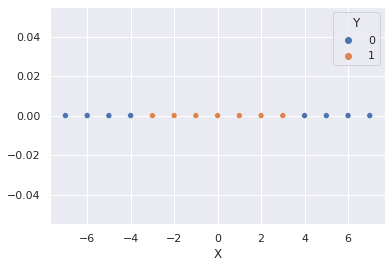

In [ ]:
# Xmat is a 15x2 matrix
Xmat = np.array([np.linspace(-7, 7, 15), [1]*15]).T
Y = np.array([0,0,0,0,1,1,1,1,1,1,1,0,0,0,0]) # Y is a 15x1 vector
data = pd.DataFrame({"X": Xmat[:,0], "Y": Y})

# plot X and color the points according to labels Y
sns.scatterplot(x = 'X', y = np.zeros(len(data)), data=data, hue = 'Y')

In [ ]:
# some helper functions

def sigmoid(V):
    """
    Function for mapping raw numbers to probabilities via the sigmoid function
    """

    return 1/(1+np.exp(-V))

def mean_negative_loglikelihood(Y, pYhat):
  return -np.mean(Y*np.log(pYhat) + (1-Y)*np.log(1-pYhat))


def calculate_gradient(Xmat, Y, theta_p, h=1e-5):
        """
        Helper function for computing the gradient at a point theta_p.
        """

        n, d = Xmat.shape

        # reshape the theta vector into the matrices that
        # map from L1 -> L2 and L2 -> L3
        theta_12 = np.reshape(theta_p[0:4], (2, 2))
        theta_23 = np.reshape(theta_p[4:], (3, 1))

        # TODO implement the correct computations for layer 2 and 3
        # compute outputs of layer 2 and append a column vector of 1s
        Amat = np.ones((n, 2))
        Amat = np.column_stack((Amat, [1]*n)) # add an intercept term to [A]

        # compute outputs of layer 3 and compute mean negative loglikelihood
        Yhat = np.ones((n, 1))
        loss_theta_p = mean_negative_loglikelihood(Y, Yhat)

        # initialize a zero gradient vector
        gradient_vec = np.ones(len(theta_p))

        # TODO implement the computation of gradient vector
        for i in range(len(theta_p)):
          pass

        return gradient_vec

# start out at a random guess for the parameters and perform gradient descent
n_iterations = 10000
alpha = 0.1
theta = np.random.uniform(-1, 1, 7)
for i in range(n_iterations):
    theta = theta - alpha*calculate_gradient(Xmat, Y, theta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


(15, 2)


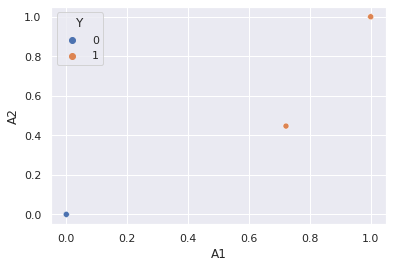

In [ ]:
# plot the transformed data
theta_12 = np.reshape(theta[0:4], (2, 2))
Amat = sigmoid(Xmat@theta_12)
data_transformed = pd.DataFrame({"A1": Amat[:, 0], "A2": Amat[:, 1], "Y": Y})
sp=sns.scatterplot(x = 'A1', y = 'A2', data = data_transformed, hue = 'Y')